<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/Randomforest_waterqualitydataset_rsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Load the uploaded dataset
df  = pd.read_csv('/content/drive/My Drive/randomforest/waterQuality1.csv')


# Display basic information and the first few rows of the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

(None,
    aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
 0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
 1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
 2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
 3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
 4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   
 
    flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
 0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
 1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
 2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
 3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
 4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   
 
    radium  selenium  s

The dataset contains 7,999 samples with 21 features, including both numeric measurements and the target variable is_safe, which indicates water safety (likely binary: 0 = unsafe, 1 = safe). Here are the key observations from the initial inspection:

 **Initial Observations:**

Most columns are of type float64, suitable for numerical analysis.

Two columns are of type object:

ammonia: should likely be numeric but is read as object—needs cleaning.

is_safe: the target label, also needs conversion to numeric if not already.

**Clean Data  and preprocess data**


In [5]:
import numpy as np

# Convert 'ammonia' to numeric, forcing errors to NaN to identify bad entries
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')

# Convert 'is_safe' to integer (if not already)
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce').astype('Int64')

# Check for missing values introduced or already present
missing_values = df.isnull().sum()

# Fill missing values with column median (a robust choice)
df.fillna(df.median(numeric_only=True), inplace=True)

# Confirm no missing values remain
post_clean_missing = df.isnull().sum()

missing_values, post_clean_missing

(aluminium      0
 ammonia        3
 arsenic        0
 barium         0
 cadmium        0
 chloramine     0
 chromium       0
 copper         0
 flouride       0
 bacteria       0
 viruses        0
 lead           0
 nitrates       0
 nitrites       0
 mercury        0
 perchlorate    0
 radium         0
 selenium       0
 silver         0
 uranium        0
 is_safe        3
 dtype: int64,
 aluminium      0
 ammonia        0
 arsenic        0
 barium         0
 cadmium        0
 chloramine     0
 chromium       0
 copper         0
 flouride       0
 bacteria       0
 viruses        0
 lead           0
 nitrates       0
 nitrites       0
 mercury        0
 perchlorate    0
 radium         0
 selenium       0
 silver         0
 uranium        0
 is_safe        0
 dtype: int64)

**Data Cleaning Completed:**

ammonia had 3 invalid entries, now replaced with the column median.

is_safe had 3 missing values, also filled using the median.

No missing values remain in the dataset. All columns are now numeric and suitable for modeling.

**Data Exploration & Train-Test Split**











In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns='is_safe')
y = df['is_safe']

# Perform train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Output the shape of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6399, 20), (1600, 20), (6399,), (1600,))

**Train-Test Split Completed:**

Training set: 6,399 samples

Testing set: 1,600 samples

Features: 20 predictors

**Training Model  **

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest classifier with default parameters
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

accuracy, report

(0.956875,
 {'0.0': {'precision': 0.9585316111488783,
   'recall': 0.9943582510578279,
   'f1-score': 0.9761163032191069,
   'support': 1418.0},
  '1.0': {'precision': 0.937984496124031,
   'recall': 0.6648351648351648,
   'f1-score': 0.7781350482315113,
   'support': 182.0},
  'accuracy': 0.956875,
  'macro avg': {'precision': 0.9482580536364547,
   'recall': 0.8295967079464963,
   'f1-score': 0.8771256757253091,
   'support': 1600.0},
  'weighted avg': {'precision': 0.9561943768148019,
   'recall': 0.956875,
   'f1-score': 0.9535959354642679,
   'support': 1600.0}})

Results (Basic Random Forest Model):

Overall Accuracy: 95.7%

**Insights:**

The model performs very well on predicting unsafe water (class 0).

Performance on the safe class (1) is weaker, especially in recall—meaning some safe samples are being classified as unsafe.

This is typical when classes are imbalanced or less separable for one class.

**Confusion Matrix**

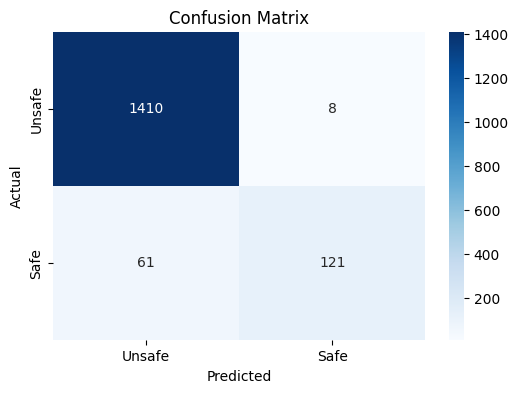

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Train a basic Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unsafe', 'Safe'], yticklabels=['Unsafe', 'Safe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**The matrix shows:**


True Positives (bottom-right): Safe water correctly predicted as safe

True Negatives (top-left): Unsafe water correctly predicted as unsafe

False Positives (bottom-left): Unsafe water incorrectly predicted as safe

False Negatives (top-right): Safe water incorrectly predicted as unsafe

**Hyperparameter Tuning**

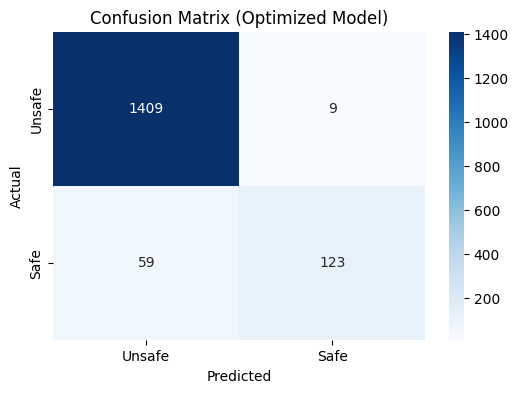

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, # 5-fold cross-validation
                           scoring='accuracy') # Use accuracy as the scoring metric

# Fit the grid search to the training data
grid_search.fit(X_train, y_train) # Fit the grid search

# Train a model using the best parameters from the grid search
optimized_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
optimized_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_optimized = optimized_rf.predict(X_test)

# Generate and plot the confusion matrix
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_optimized, annot=True, fmt='d', cmap='Blues', xticklabels=['Unsafe', 'Safe'], yticklabels=['Unsafe', 'Safe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Optimized Model)')
plt.show()